In [1]:
cd  /Users/driscoll/Documents/GitHub/fnc/matlab
FNC_init

[**Demo %s**](#demo-orthogonal-approx)

Let's approximate $e^x$ over the interval $[−1,1]$. We can sample it at, say, 15 points, and find the best-fitting straight line to that data.

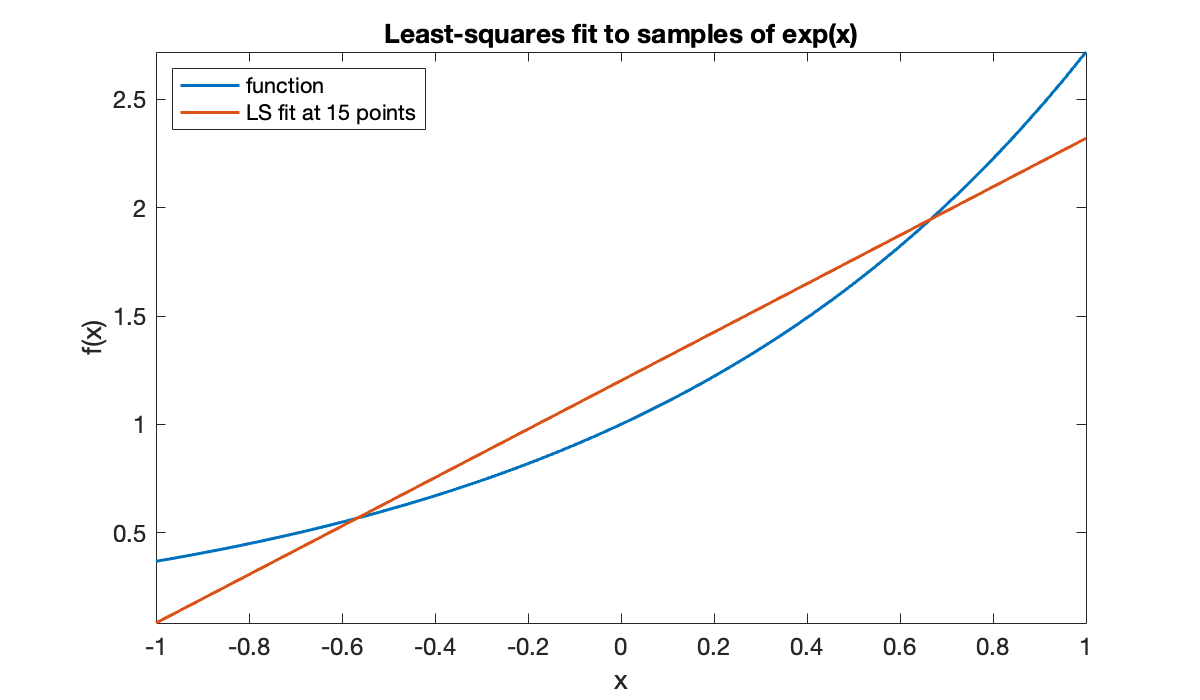

In [2]:
clf;  fplot(@exp, [-1, 1], displayname="function")
t = linspace(-1, 1, 15)';
y = exp(t);
V = [t.^0, t];
c = V \ y;
p = @(t) c(1) + c(2)*t;

hold on,  fplot(p, [-1, 1], displayname="LS fit at 15 points")
title('Least-squares fit to samples of exp(x)')    
xlabel('x'),  ylabel('f(x)')    
legend(location="northwest")    

There's nothing special about 15 points. Choosing more doesn't change the result much.

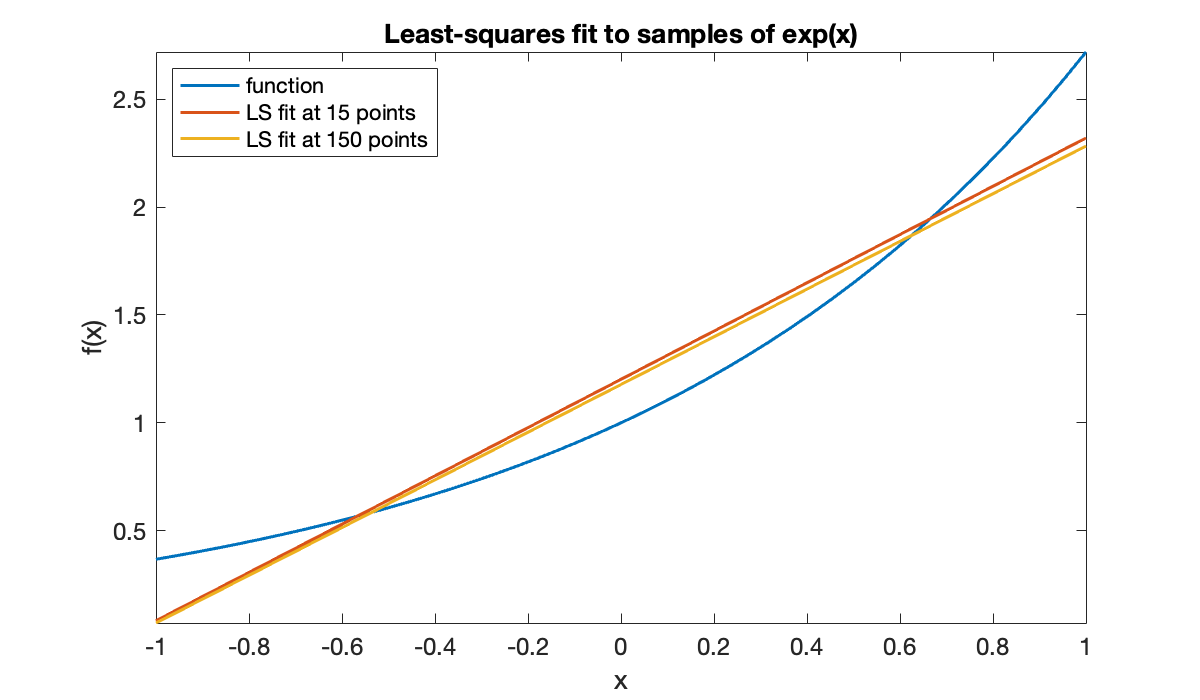

In [3]:
t = linspace(-1, 1, 150)';
y = exp(t);
V = [t.^0, t];
c = V \ y;
p = @(t) c(1) + c(2)*t;
fplot(p, [-1, 1], displayname="LS fit at 150 points")

This situation is unlike interpolation, where the degree of the interpolant increases with the number of nodes. Here, the linear fit is apparently approaching a limit that we may think of as a continuous least-squares fit.

In [4]:
n = (40:60:400)';
slope = zeros(size(n));
intercept = zeros(size(n));

for k = 1:length(n)
    t = linspace(-1, 1, n(k))';
    V = [t.^0, t];
    c = V \ exp(t);
    intercept(k) = c(1);
    slope(k) = c(2);
end
disp(table(n, intercept, slope))

     n     intercept    slope 
    ___    _________    ______

     40     1.1846      1.1091
    100     1.1789      1.1058
    160     1.1775       1.105
    220     1.1769      1.1046
    280     1.1765      1.1044
    340     1.1763      1.1043
    400     1.1761      1.1042

